In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
raw = pd.read_csv('../Data/dat_raw.csv', index_col=0)
train_X = pd.read_csv('../Data/X_train.csv', index_col=0)
test_X = pd.read_csv('../Data/X_test.csv', index_col=0)
train_y = pd.read_csv('../Data/y_train.csv', index_col=0)
test_y = pd.read_csv('../Data/y_test.csv', index_col=0)

In [4]:
# train_X.info()

In [5]:
train_X.shape, test_X.shape

((37216, 84), (9304, 84))

In [6]:
train_y.target.unique()

array([1, 3, 2, 4])

perceptron linear seperable checking: 
- training f1 0.5966
- training acc 0.6409
- acc per class: 1 very high, over 90\%

In [7]:
# X_training = train_X.copy().values
# y_training = train_y.copy().values.ravel()
# X_testing = test_X.copy().values
# y_testing = test_y.copy().values.ravel()

cluster elbow checking: n_clusters = 4

In [8]:
# # clustering checking
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=21)
#     kmeans.fit(X_training)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(range(1,11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

add a clustering feature doesn't help a lot (according to lightGBM)

In [9]:
# n_clusters = 4

# # kmeans clustering
# clf = KMeans(n_clusters=n_clusters, random_state=21)
# clf.fit(X_training)
# y_labels_train = clf.predict(X_training)
# y_labels_test = clf.predict(X_testing)

# # add as feature
# train_X['km_cluster'] = y_labels_train
# test_X['km_cluster'] = y_labels_test

### SVM model

In [10]:
X_train = train_X.copy().values
y_train = train_y.copy().values.ravel()
X_test = test_X.copy().values
y_test = test_y.copy().values.ravel()

In [11]:
# scaling, minmax
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**param tuning**

In [14]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.1, 0.5, 1.0],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'degree': [3],
    'decision_function_shape': ['ovo']
}
# model
svm = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best = grid_search.best_params_
best

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  36 | elapsed:  3.2min remaining: 25.6min
[Parallel(n_jobs=-1)]: Done  23 out of  36 | elapsed:  4.0min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.6min finished


{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'poly'}

--------------------------------------------------
Training f1: 0.6157
Training Accuracy: 0.6697
--------------------------------------------------
Testing f1: 0.6027
Testing Accuracy: 0.6596
Testing Confusion Matrix:


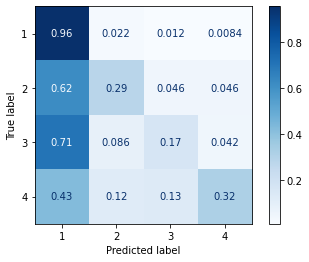

In [16]:
# checking

# model, ovo
clf = SVC(**best)
clf.fit(X_train, y_train)

# make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test) 

# metrics
# training
print('-'*50)
print('Training f1: {0:.4f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
print('Training Accuracy: {0:.4f}'.format(accuracy_score(y_train, y_train_pred)))
# testing
print('-'*50)
print('Testing f1: {0:.4f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
print('Testing Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_test_pred)))
print('Testing Confusion Matrix:')
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show()

In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.8, 1.0],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],
    'decision_function_shape': ['ovo']
}
# model
svm = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best2 = grid_search.best_params_
best2

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  3.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.3min finished


{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 5, 'kernel': 'poly'}

--------------------------------------------------
Training f1: 0.6640
Training Accuracy: 0.7017
--------------------------------------------------
Testing f1: 0.6172
Testing Accuracy: 0.6637
Testing Confusion Matrix:


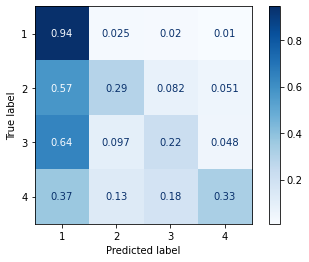

In [18]:
# checking

# model, ovo
clf = SVC(**best2)
clf.fit(X_train, y_train)

# make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test) 

# metrics
# training
print('-'*50)
print('Training f1: {0:.4f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
print('Training Accuracy: {0:.4f}'.format(accuracy_score(y_train, y_train_pred)))
# testing
print('-'*50)
print('Testing f1: {0:.4f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
print('Testing Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_test_pred)))
print('Testing Confusion Matrix:')
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show()

In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [1.0],
    'kernel': ['poly'],
    'degree': [5, 6, 7],
    'decision_function_shape': ['ovo']
}
# model
svm = SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best3 = grid_search.best_params_
best3

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  2.6min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  3.0min remaining:   51.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.1min finished


{'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 5, 'kernel': 'poly'}